# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education.

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms.
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers,
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn.
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data

In [56]:
#importing the required librariers
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix,precision_recall_curve,recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder,StandardScaler
import warnings
warnings.filterwarnings("ignore")

## Data Overview

- Observations
- Sanity checks

In [57]:
# Loading the dataset
df = pd.read_csv('/content/ExtraaLearn.csv')

In [58]:
# Displaying the first five rows
print(df.head())

       ID  age current_occupation first_interaction profile_completed  \
0  EXT001   57         Unemployed           Website              High   
1  EXT002   56       Professional        Mobile App            Medium   
2  EXT003   52       Professional           Website            Medium   
3  EXT004   53         Unemployed           Website              High   
4  EXT005   23            Student           Website              High   

   website_visits  time_spent_on_website  page_views_per_visit  \
0               7                   1639                 1.861   
1               2                     83                 0.320   
2               3                    330                 0.074   
3               4                    464                 2.057   
4               4                    600                16.914   

      last_activity print_media_type1 print_media_type2 digital_media  \
0  Website Activity               Yes                No           Yes   
1  Website Activit

In [59]:
# Summary statistics
print(df.describe())


               age  website_visits  time_spent_on_website  \
count  4612.000000     4612.000000            4612.000000   
mean     46.201214        3.566782             724.011275   
std      13.161454        2.829134             743.828683   
min      18.000000        0.000000               0.000000   
25%      36.000000        2.000000             148.750000   
50%      51.000000        3.000000             376.000000   
75%      57.000000        5.000000            1336.750000   
max      63.000000       30.000000            2537.000000   

       page_views_per_visit       status  
count           4612.000000  4612.000000  
mean               3.026126     0.298569  
std                1.968125     0.457680  
min                0.000000     0.000000  
25%                2.077750     0.000000  
50%                2.792000     0.000000  
75%                3.756250     1.000000  
max               18.434000     1.000000  


There are 4612 rows.
The maximum value for age is 63 while minimum is 18.
The maximum value for website visits is 30 while minimum is 0.
The maximum value for time spent on website is 2537 while minimum is 0.
The maximum value for pages views per visit18.434 is 63 while minimum is 0.

In [60]:
# Information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

We see that there are no columns withlout values


there are 15 columns and 4612 rows

In [61]:
cat_cols=['ID','current_occupation','first_interaction','first_interaction','profile_completed','last_activity','print_media_type1','print_media_type2','digital_media','educational_channels','referral']

num_cols=['age','website_visits','time_spent_on_website','page_views_per_visit','status']

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status?
3. The company uses multiple modes to interact with prospects. Which way of interaction works best?
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

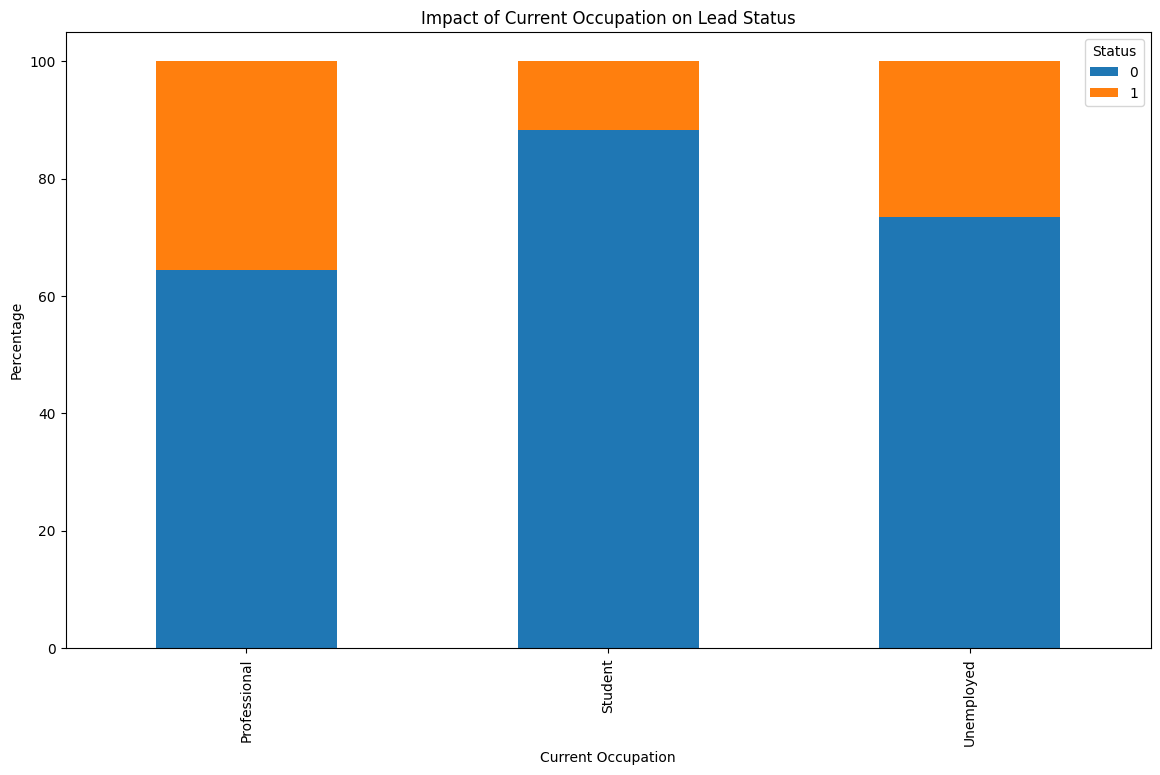

In [62]:
# Q1
occupation_status = df.groupby(['current_occupation', 'status']).size().unstack(fill_value=0)
occupation_status_percent = occupation_status.div(occupation_status.sum(axis=1), axis=0) * 100

# relationship between current occupation and lead status
plt.figure(figsize=(14, 8))
occupation_status_percent.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Impact of Current Occupation on Lead Status')
plt.xlabel('Current Occupation')
plt.ylabel('Percentage')
plt.legend(title='Status', loc='upper right')
plt.show()

Occupation 0 has a higher conversion rate compared to occupation 1 and 2

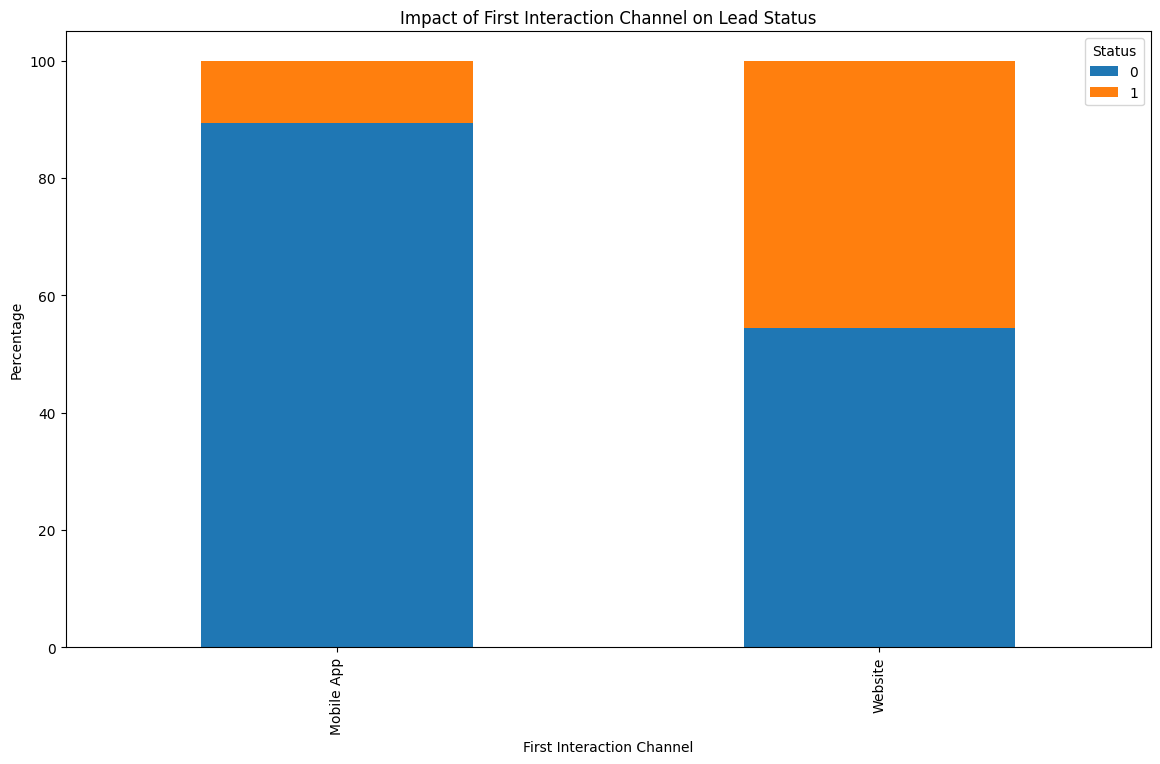

In [63]:
#Q.2
interaction_status = df.groupby(['first_interaction', 'status']).size().unstack(fill_value=0)
interaction_status_percent = interaction_status.div(interaction_status.sum(axis=1), axis=0) * 100

# Plotting the relationship between first interaction channel and lead status
plt.figure(figsize=(14, 8))
interaction_status_percent.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Impact of First Interaction Channel on Lead Status')
plt.xlabel('First Interaction Channel')
plt.ylabel('Percentage')
plt.legend(title='Status', loc='upper right')
plt.show()

Channel 1 has a significantly higher conversion rate compared to channel 0. This indicates that leads interacting through channel 1 are more likely to convert.

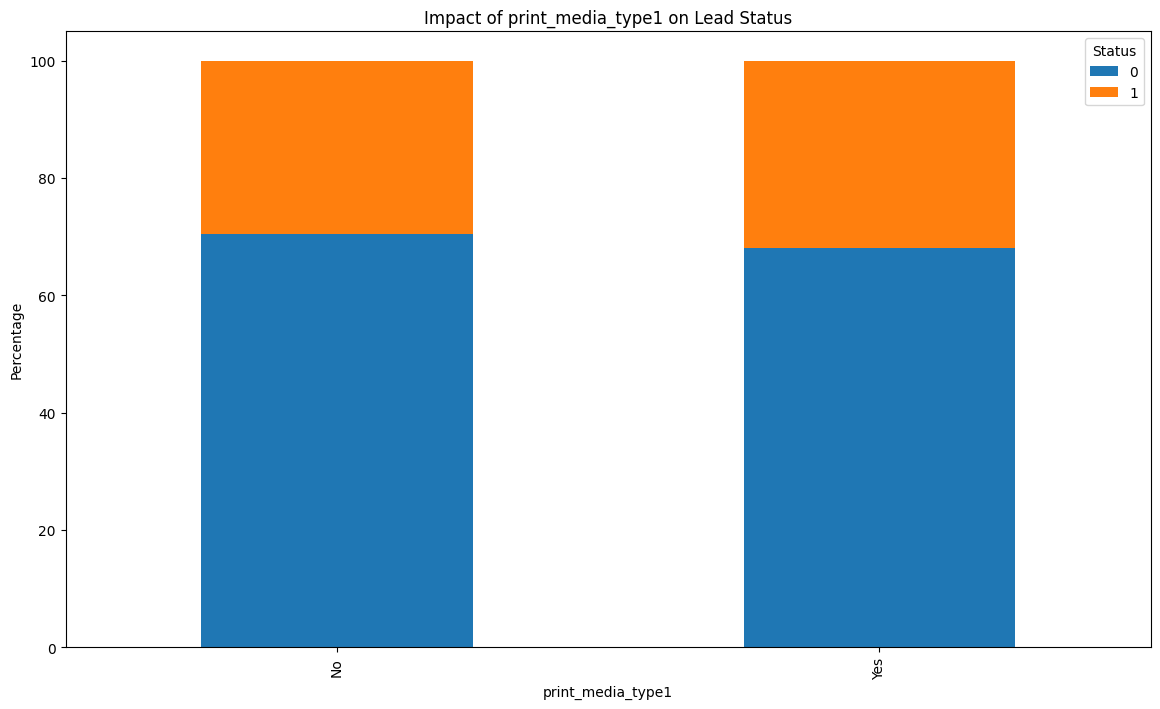

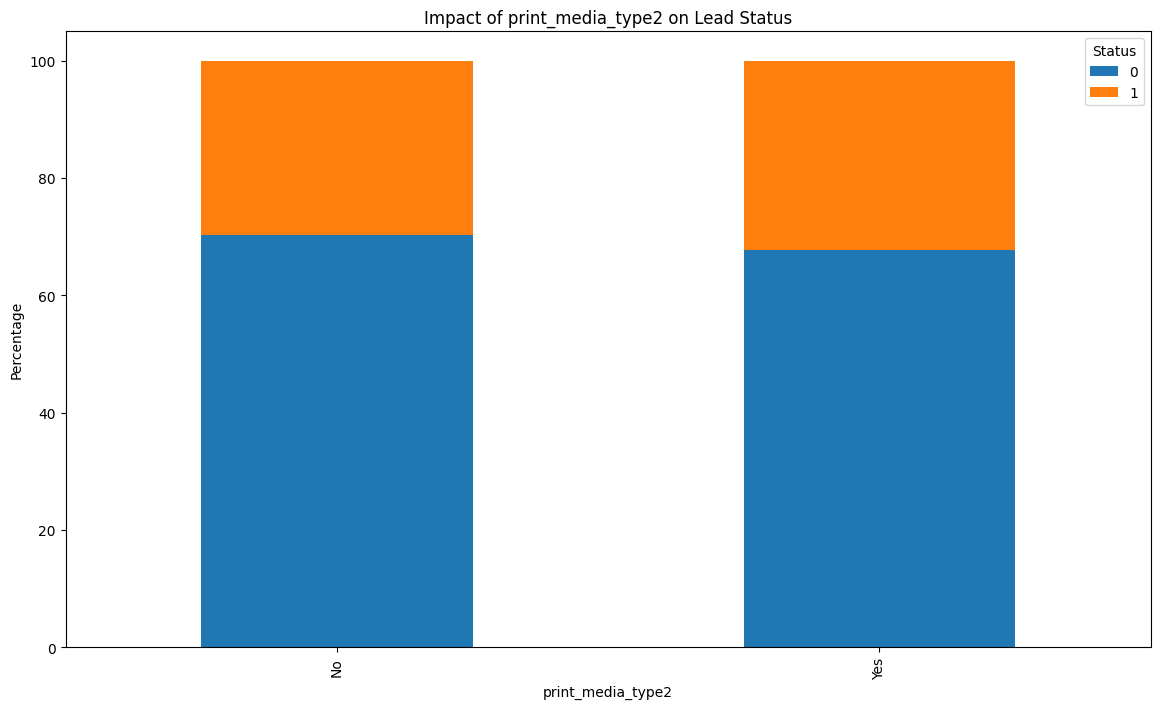

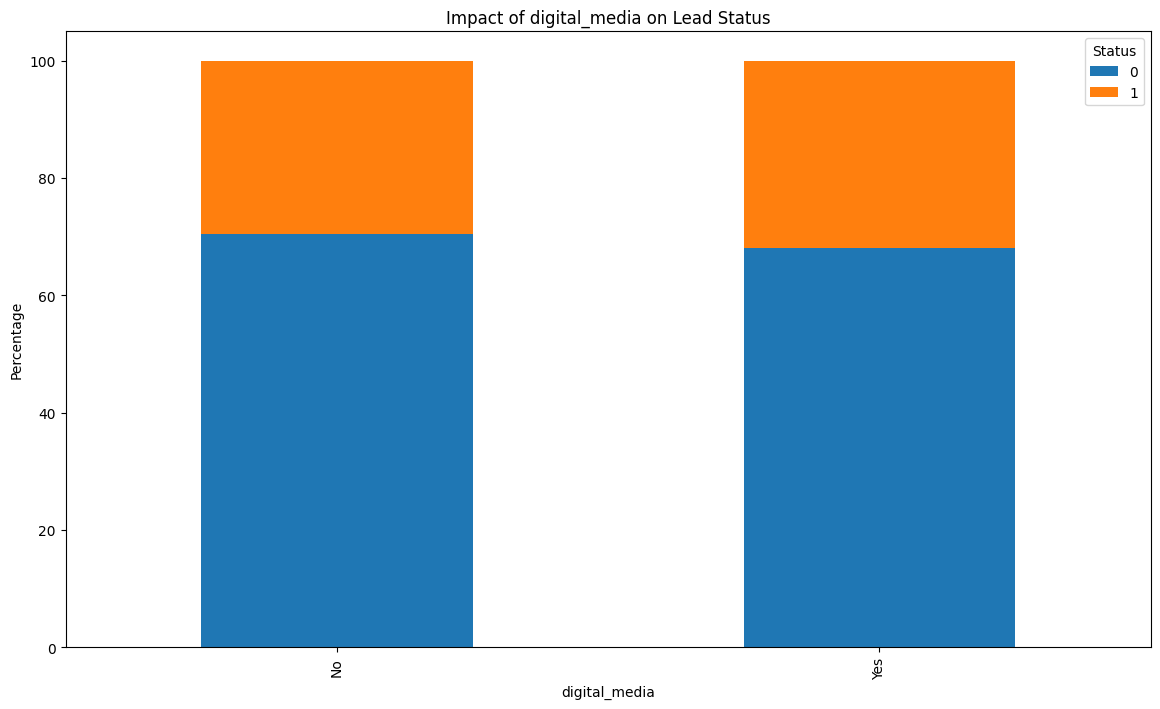

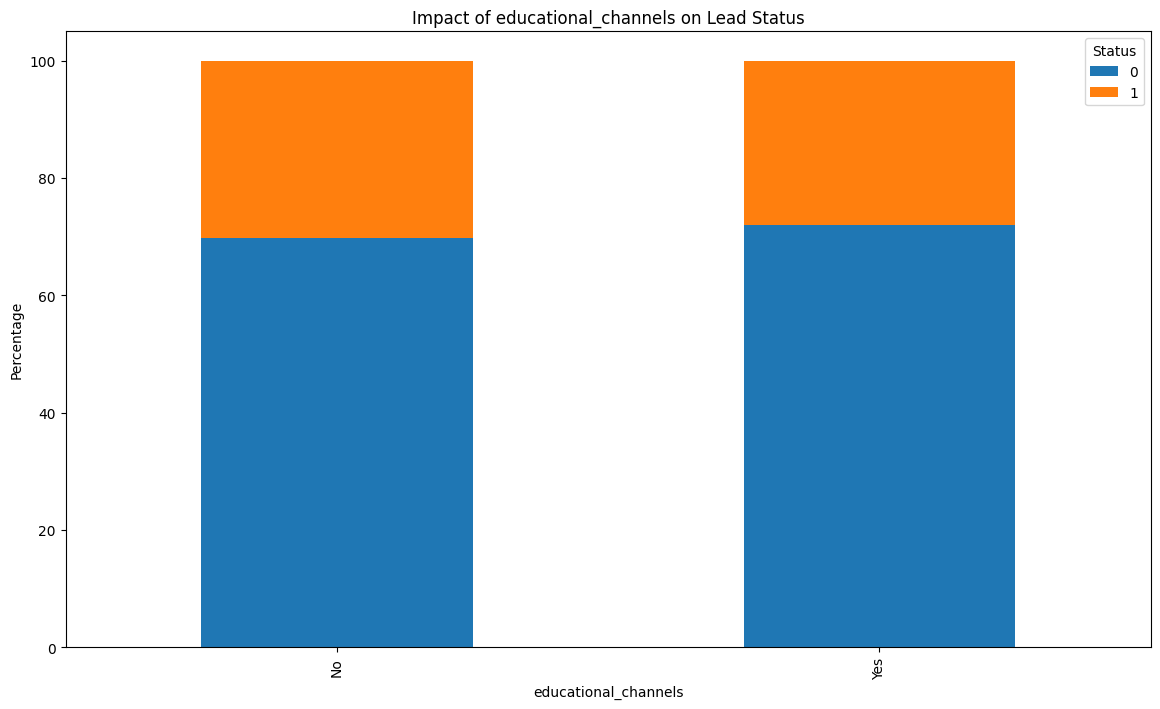

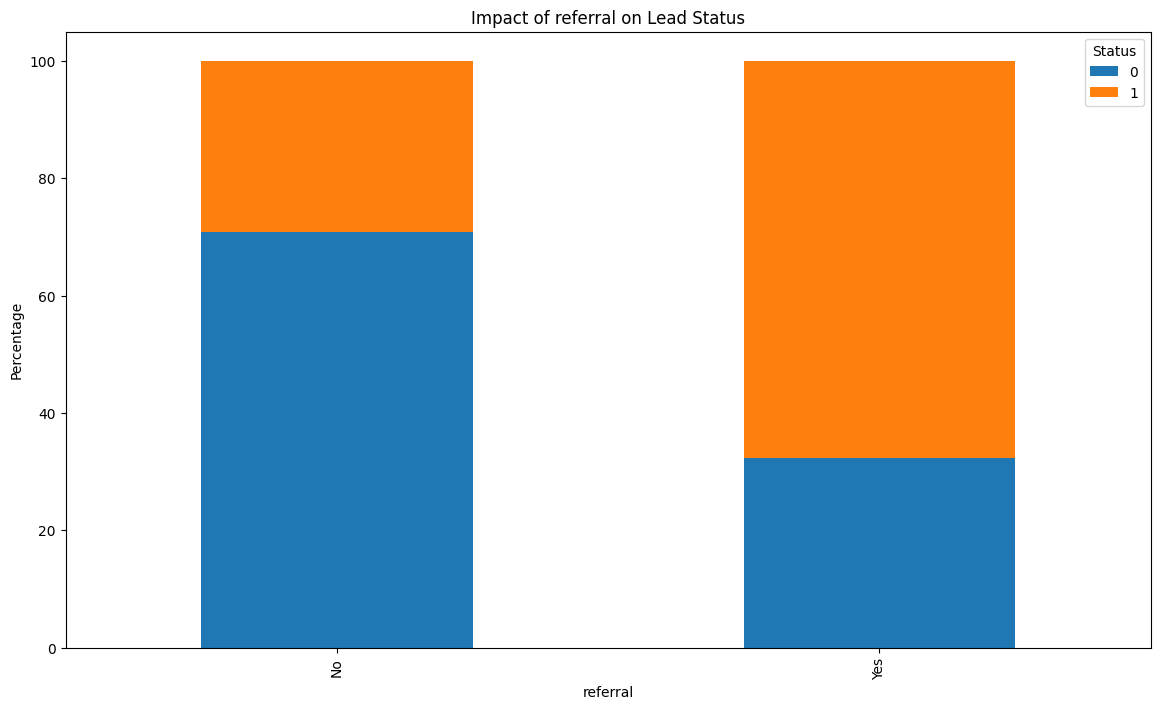

In [64]:
#Q.3
interaction_modes = ['print_media_type1', 'print_media_type2', 'digital_media', 'educational_channels', 'referral']
interaction_effects = {}

for mode in interaction_modes:
    interaction_effects[mode] = df.groupby([mode, 'status']).size().unstack(fill_value=0)
    interaction_effects[mode] = interaction_effects[mode].div(interaction_effects[mode].sum(axis=1), axis=0) * 100

# relationship between each mode of interaction and lead status
for mode, effect in interaction_effects.items():
    plt.figure(figsize=(14, 8))
    effect.plot(kind='bar', stacked=True, ax=plt.gca())
    plt.title(f'Impact of {mode} on Lead Status')
    plt.xlabel(f'{mode}')
    plt.ylabel('Percentage')
    plt.legend(title='Status', loc='upper right')
    plt.show()

print media type 1 does have some impact on conversion

engaging with digital media does not have a significant impact on converting leads

The presence of educational channel engagement does not appear to significantly affect lead conversion rates.

referrals have a positive impact on lead conversion

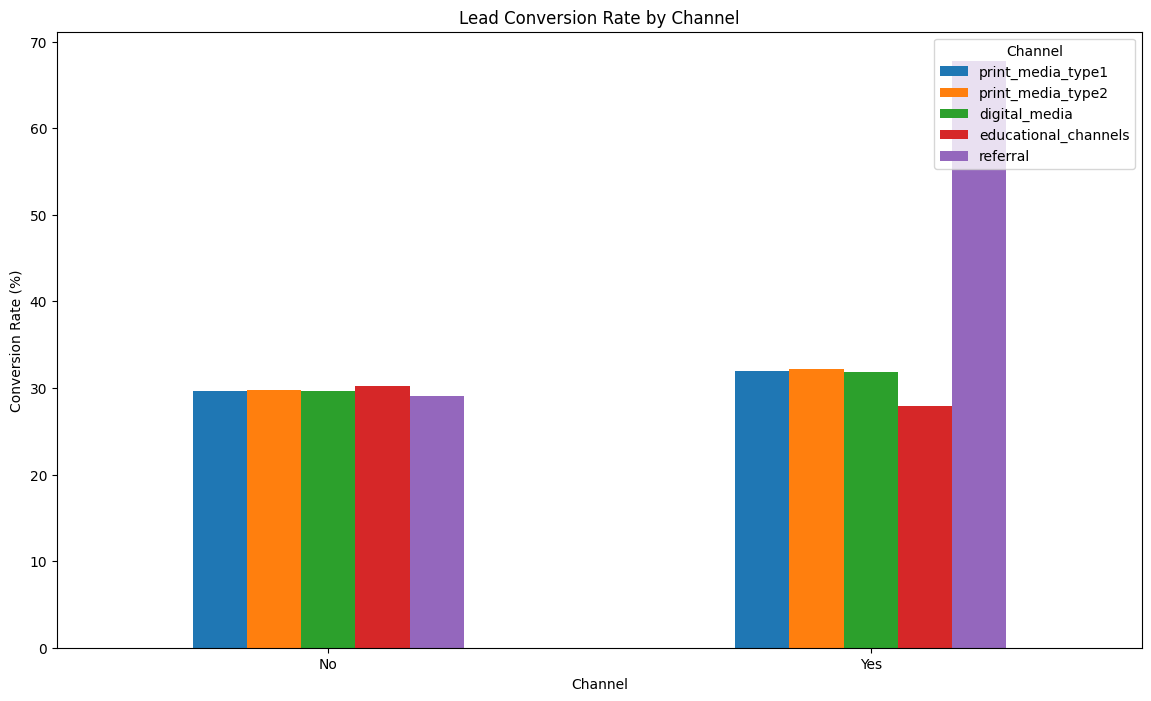

In [65]:
#Q.4
interaction_modes = ['print_media_type1', 'print_media_type2', 'digital_media', 'educational_channels', 'referral']
conversion_rates = {}

for mode in interaction_modes:
    conversion_rate = df.groupby(mode)['status'].mean() * 100
    conversion_rates[mode] = conversion_rate

# Create a DataFrame for conversion rates
conversion_df = pd.DataFrame(conversion_rates)

# Plotting lead conversion rates by channel
plt.figure(figsize=(14, 8))
conversion_df.plot(kind='bar', ax=plt.gca())
plt.title('Lead Conversion Rate by Channel')
plt.xlabel('Channel')
plt.ylabel('Conversion Rate (%)')
plt.legend(title='Channel', loc='upper right')
plt.xticks(rotation=0)
plt.show()


The referral channel has a significantly higher conversion rate in one scenario compared to the others

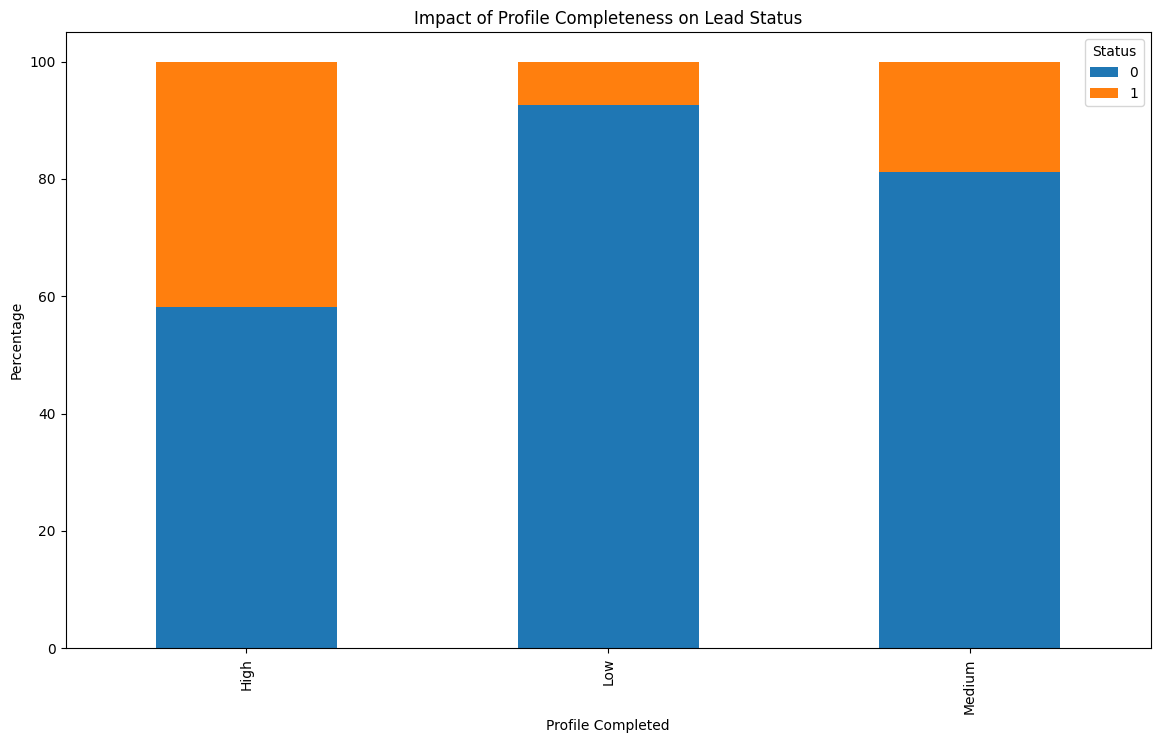

In [66]:
# Q.5
profile_status = df.groupby(['profile_completed', 'status']).size().unstack(fill_value=0)
profile_status_percent = profile_status.div(profile_status.sum(axis=1), axis=0) * 100

# Plotting the relationship between profile completeness and lead status
plt.figure(figsize=(14, 8))
profile_status_percent.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Impact of Profile Completeness on Lead Status')
plt.xlabel('Profile Completed')
plt.ylabel('Percentage')
plt.legend(title='Status', loc='upper right')
plt.show()


There is a strong positive correlation between profile completeness and lead conversion rates.

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [67]:
#splitting data
X = df.drop(columns=['status'])
y = df['status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# shapes of the training and testing sets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3689, 14) (923, 14) (3689,) (923,)


In [68]:
# missing values
print(df.isnull().sum())

ID                       0
age                      0
current_occupation       0
first_interaction        0
profile_completed        0
website_visits           0
time_spent_on_website    0
page_views_per_visit     0
last_activity            0
print_media_type1        0
print_media_type2        0
digital_media            0
educational_channels     0
referral                 0
status                   0
dtype: int64


No missing values

## EDA

- It is a good idea to explore the data once again after manipulating it.

In [69]:
# summary statistics
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
age,4612.0,46.201214,13.161454,18.0,36.00000,51.000,57.00000,63.000
website_visits,4612.0,3.566782,2.829134,0.0,2.00000,3.000,5.00000,30.000
time_spent_on_website,4612.0,724.011275,743.828683,0.0,148.75000,376.000,1336.75000,2537.000
page_views_per_visit,4612.0,3.026126,1.968125,0.0,2.07775,2.792,3.75625,18.434
status,4612.0,0.298569,0.457680,0.0,0.00000,0.000,1.00000,1.000


Gives us info about the mean minimum value , the percentiles and the maximum vales.

In [70]:
#detection and diaplying the outliers
def detect_outliers_iqr(df):
    outliers = {}
    for column in df.select_dtypes(include=np.number).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[column] = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    return outliers
print(detect_outliers_iqr(df))

{'age': Series([], Name: age, dtype: int64), 'website_visits': 6       13
31      13
32      12
66      25
201     14
        ..
4566    13
4571    12
4583    24
4589    16
4607    15
Name: website_visits, Length: 154, dtype: int64, 'time_spent_on_website': Series([], Name: time_spent_on_website, dtype: int64), 'page_views_per_visit': 4       16.914
32      18.434
47       7.050
110      7.364
121      6.887
         ...  
4470     6.810
4507     6.822
4514     7.997
4572     7.397
4597     8.246
Name: page_views_per_visit, Length: 257, dtype: float64, 'status': Series([], Name: status, dtype: int64)}


In [71]:
#removing outliers
def remove_outliers_iqr(df):
    for column in df.select_dtypes(include=np.number).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

data_no_outliers = remove_outliers_iqr(df)

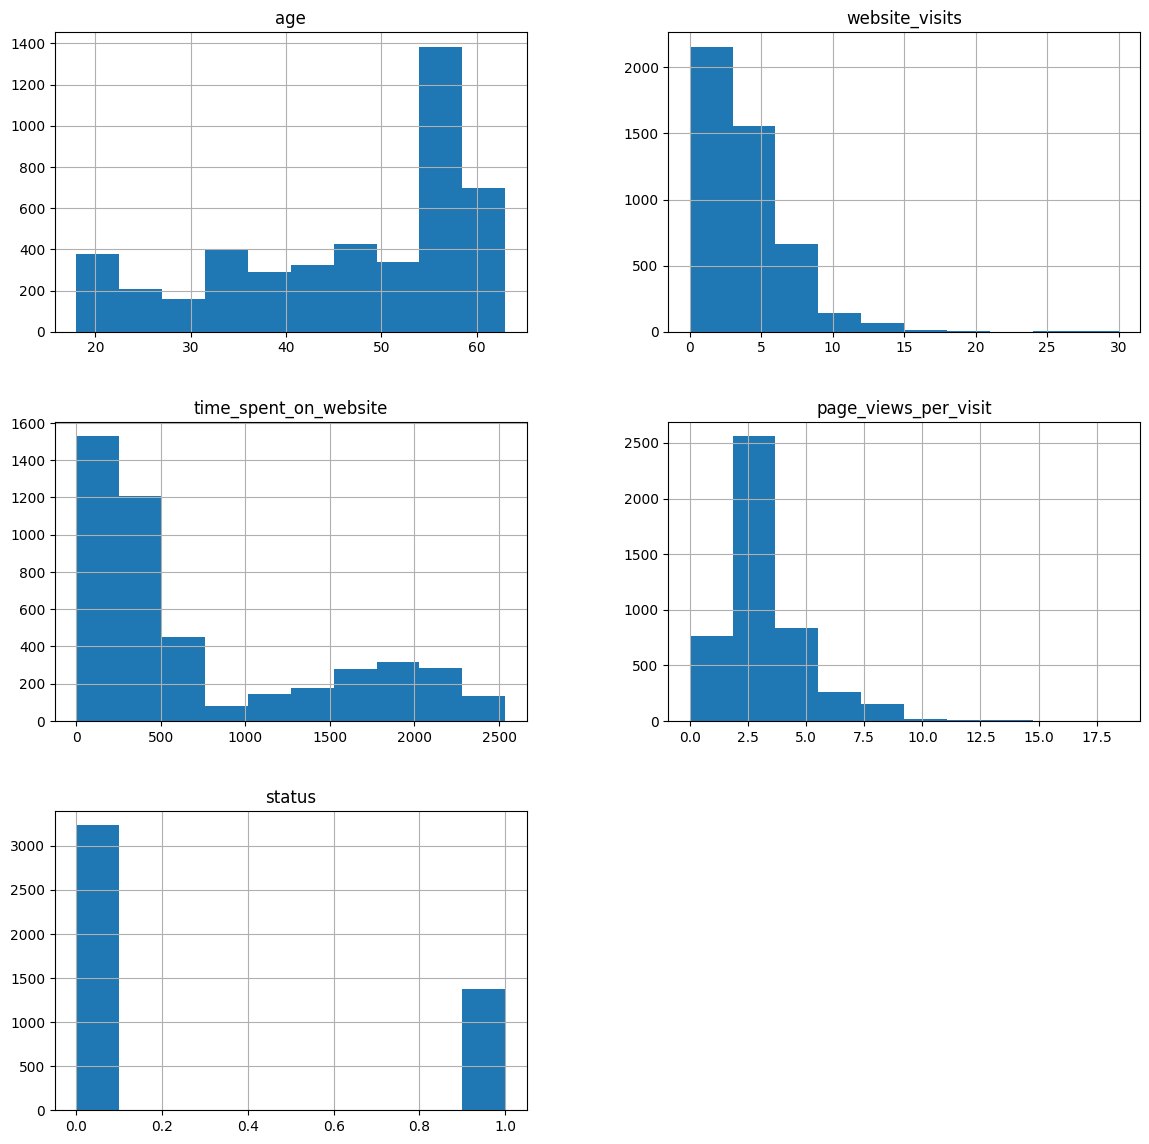

In [72]:
# Creating histograms
df[num_cols].hist(figsize=(14,14))
plt.show()

The significant presence of leads in the 20-30 and 50-60 age ranges should be focussed

efforts need to be made to improve website engagement to potentially increase conversions.

The relatively low number of conversions (status 1) compared to non-conversions (status 0) indicates a potential area for improvement in the conversion strategy

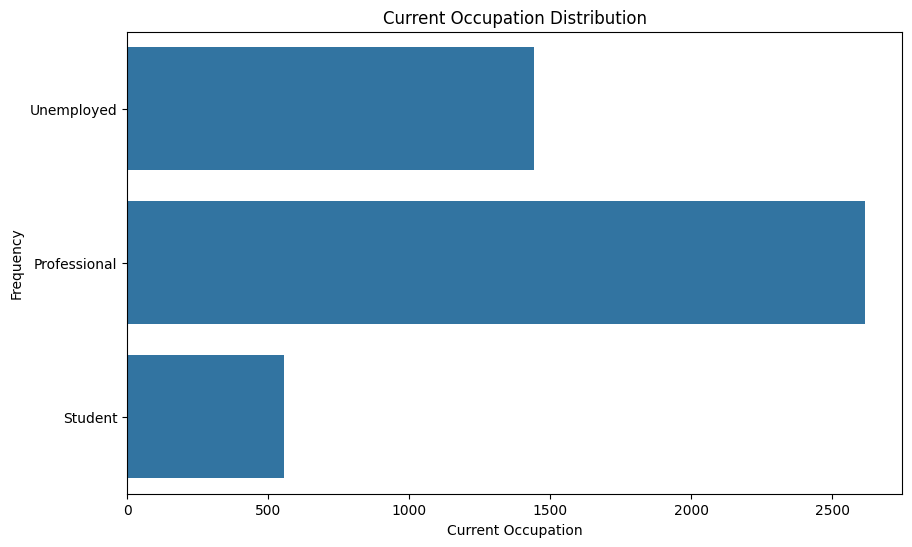

In [73]:
#count plot for cuurent occupation distribution
plt.figure(figsize=(10, 6))
sns.countplot(df['current_occupation'])
plt.title('Current Occupation Distribution')
plt.xlabel('Current Occupation')
plt.ylabel('Frequency')
plt.show()

A majorty of peple are professional while half of the ratio about the total are unemployed and less number of them are students

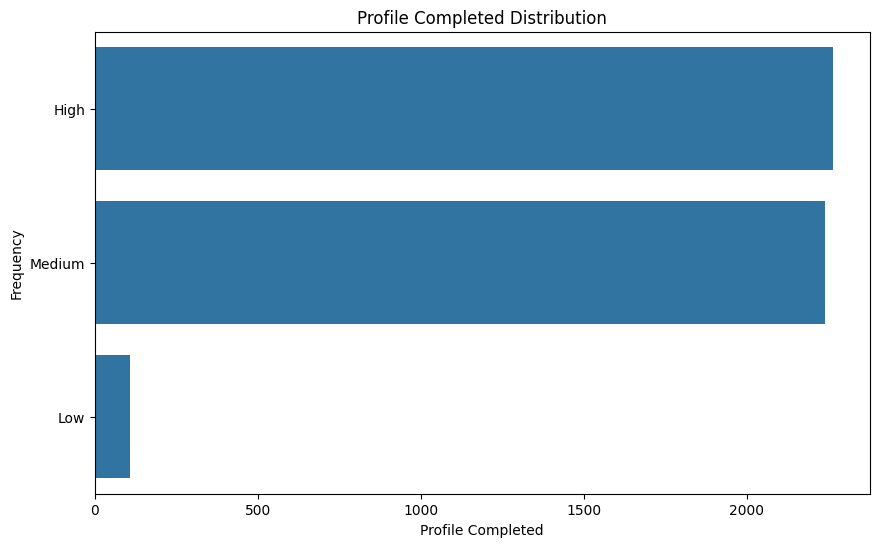

In [74]:
#countplot for distribution of profile_completed
plt.figure(figsize=(10, 6))
sns.countplot(df['profile_completed'])
plt.title('Profile Completed Distribution')
plt.xlabel('Profile Completed')
plt.ylabel('Frequency')
plt.show()

Most of them have high frequencies of profile completion and equally medium completed while very less fruquency of low completion

**Bivariate** Analysis

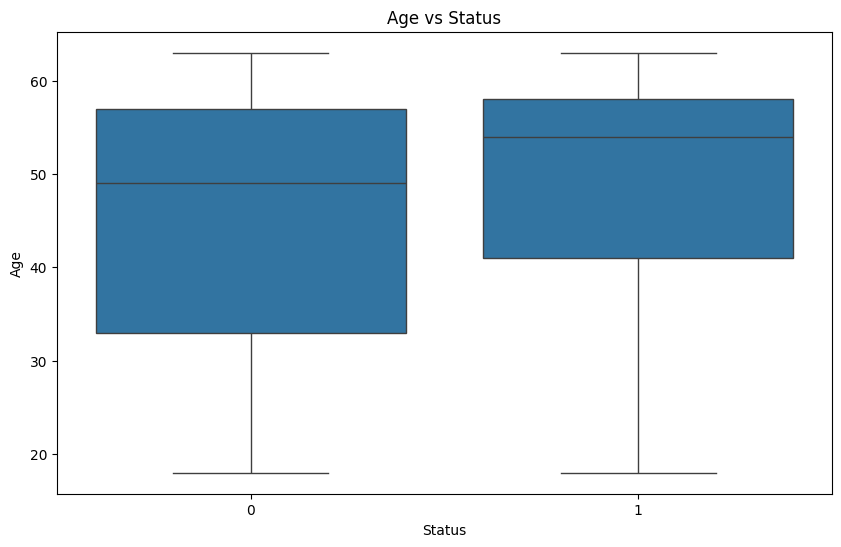

In [75]:
# Relationship between age and status
plt.figure(figsize=(10, 6))
sns.boxplot(x='status', y='age', data=df)
plt.title('Age vs Status')
plt.xlabel('Status')
plt.ylabel('Age')
plt.show()

The median age for both groups is around 50 years old, but the group represented by Status 1 has a slightly higher median.



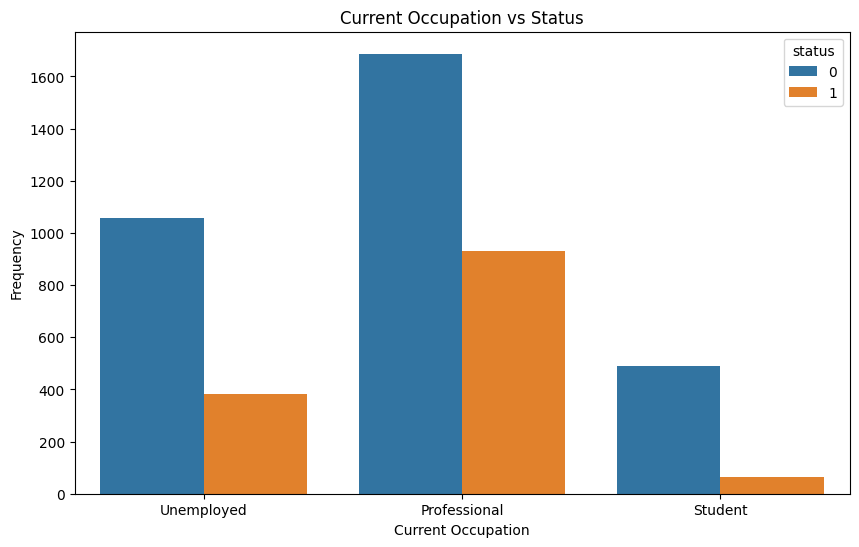

In [76]:
# countplot between current_occupation and status
plt.figure(figsize=(10, 6))
sns.countplot(x='current_occupation', hue='status', data=df)
plt.title('Current Occupation vs Status')
plt.xlabel('Current Occupation')
plt.ylabel('Frequency')
plt.show()

Professionals have high page view frequencies

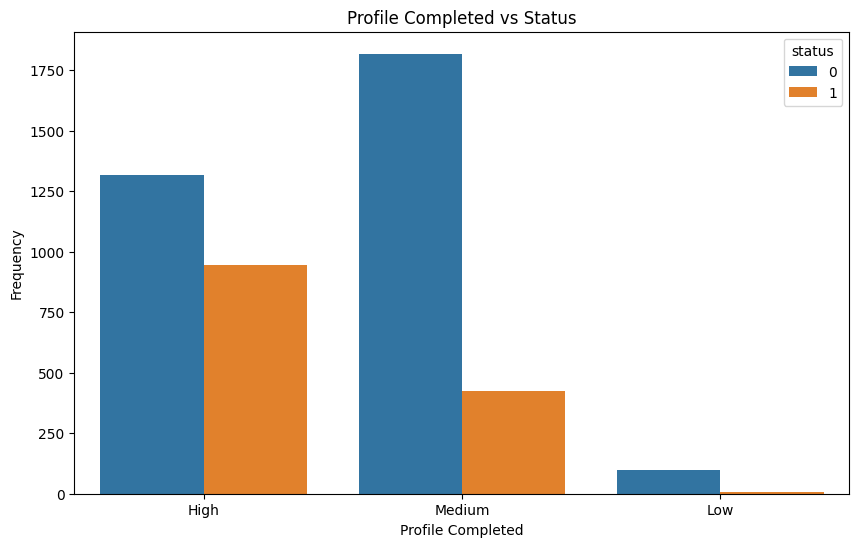

In [77]:
# countplot between profile_completed and status
plt.figure(figsize=(10, 6))
sns.countplot(x='profile_completed', hue='status', data=df)
plt.title('Profile Completed vs Status')
plt.xlabel('Profile Completed')
plt.ylabel('Frequency')
plt.show()

Medium profile completers have high frequencies for page views

<Axes: >

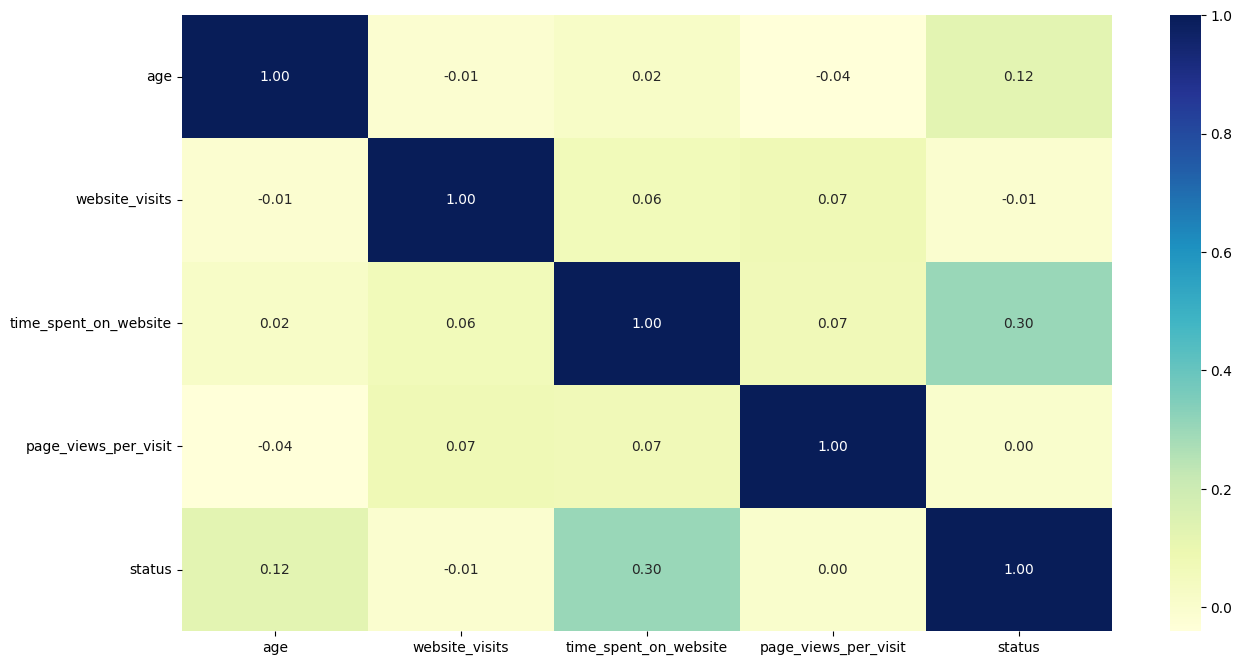

In [78]:
# heatmap for correlation between numerical variables
plt.figure(figsize=(15,8))
sns.heatmap(df[num_cols].corr(),annot=True, fmt='0.2f', cmap='YlGnBu')

Age,Website visits,time spent on website, Page views per visit and status are highly correalted

## Building a Decision Tree model

In [79]:
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

# Splitting the data into features and target variable
X = df.drop(columns=['status'])
y = df['status']#status is target variable

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#function to display performance metrics
def metrics_score(actual, predicted):
    print(f'Accuracy: {accuracy_score(actual, predicted)}')
    print('Classification Report:')
    print(classification_report(actual, predicted))
    print('Confusion Matrix:')
    print(confusion_matrix(actual, predicted))


In [80]:
# Building the Decision Tree model
dt = DecisionTreeClassifier(class_weight={0: 0.17, 1: 0.83}, random_state=1)

# Fitting the  model
dt.fit(X_train, y_train)



DecisionTreeClassifier(class_weight={0: 0.17, 1: 0.83}, random_state=1)

In [81]:
# Checking performance on the training dataset
y_train_pred_dt = dt.predict(X_train)
print("Training Performance:")
metrics_score(y_train, y_train_pred_dt)



Training Performance:
Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2586
           1       1.00      1.00      1.00      1103

    accuracy                           1.00      3689
   macro avg       1.00      1.00      1.00      3689
weighted avg       1.00      1.00      1.00      3689

Confusion Matrix:
[[2586    0]
 [   0 1103]]


Accuracy: 1.0


Class 0: Precision = 1.00, Recall = 1.00, F1-Score = 1.00
Class 1: Precision = 1.00, Recall = 1.00, F1-Score = 1.00

Confusion Matrix:
[[2586, 0],
[0, 1103]]

In [82]:
# Checking performance on the test dataset
y_test_pred_dt = dt.predict(X_test)
print("Testing Performance:")
metrics_score(y_test, y_test_pred_dt)



Testing Performance:
Accuracy: 0.8179848320693391
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.90      0.87       649
           1       0.72      0.63      0.67       274

    accuracy                           0.82       923
   macro avg       0.79      0.76      0.77       923
weighted avg       0.81      0.82      0.81       923

Confusion Matrix:
[[582  67]
 [101 173]]


Accuracy: 0.818


Class 0: Precision = 0.85, Recall = 0.90, F1-Score = 0.87
Class 1: Precision = 0.72, Recall = 0.63, F1-Score = 0.67



Confusion Matrix:
[[582, 67],
[101, 173]]

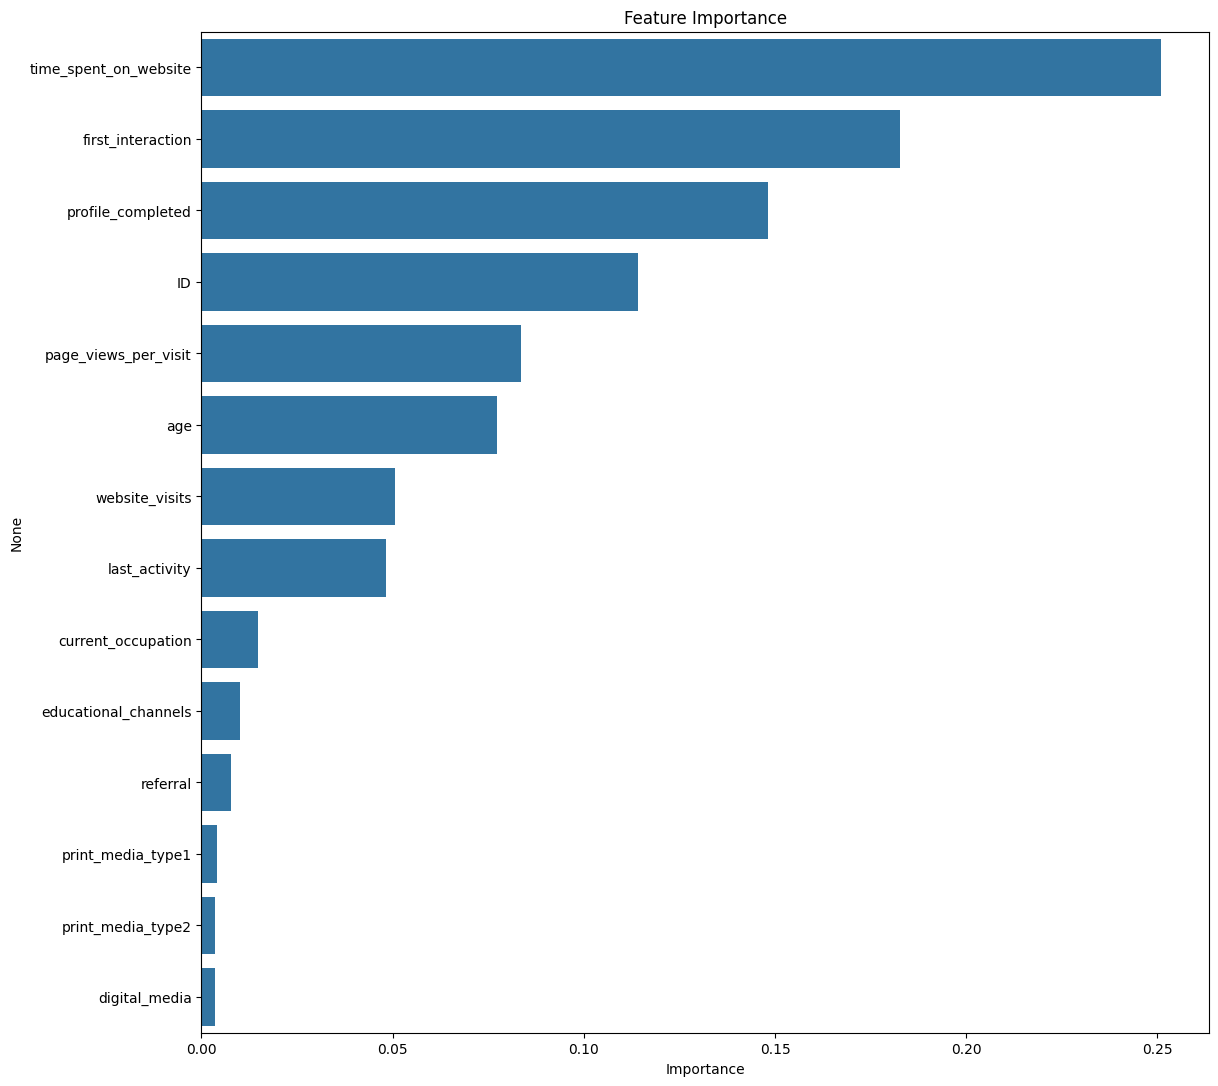

In [83]:
# Plot the feature importance
importances = dt.feature_importances_
columns = X.columns
importance_df = pd.DataFrame(importances, index=columns, columns=['Importance']).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(13, 13))
sns.barplot(data=importance_df, x='Importance', y=importance_df.index)
plt.title('Feature Importance')
plt.show()



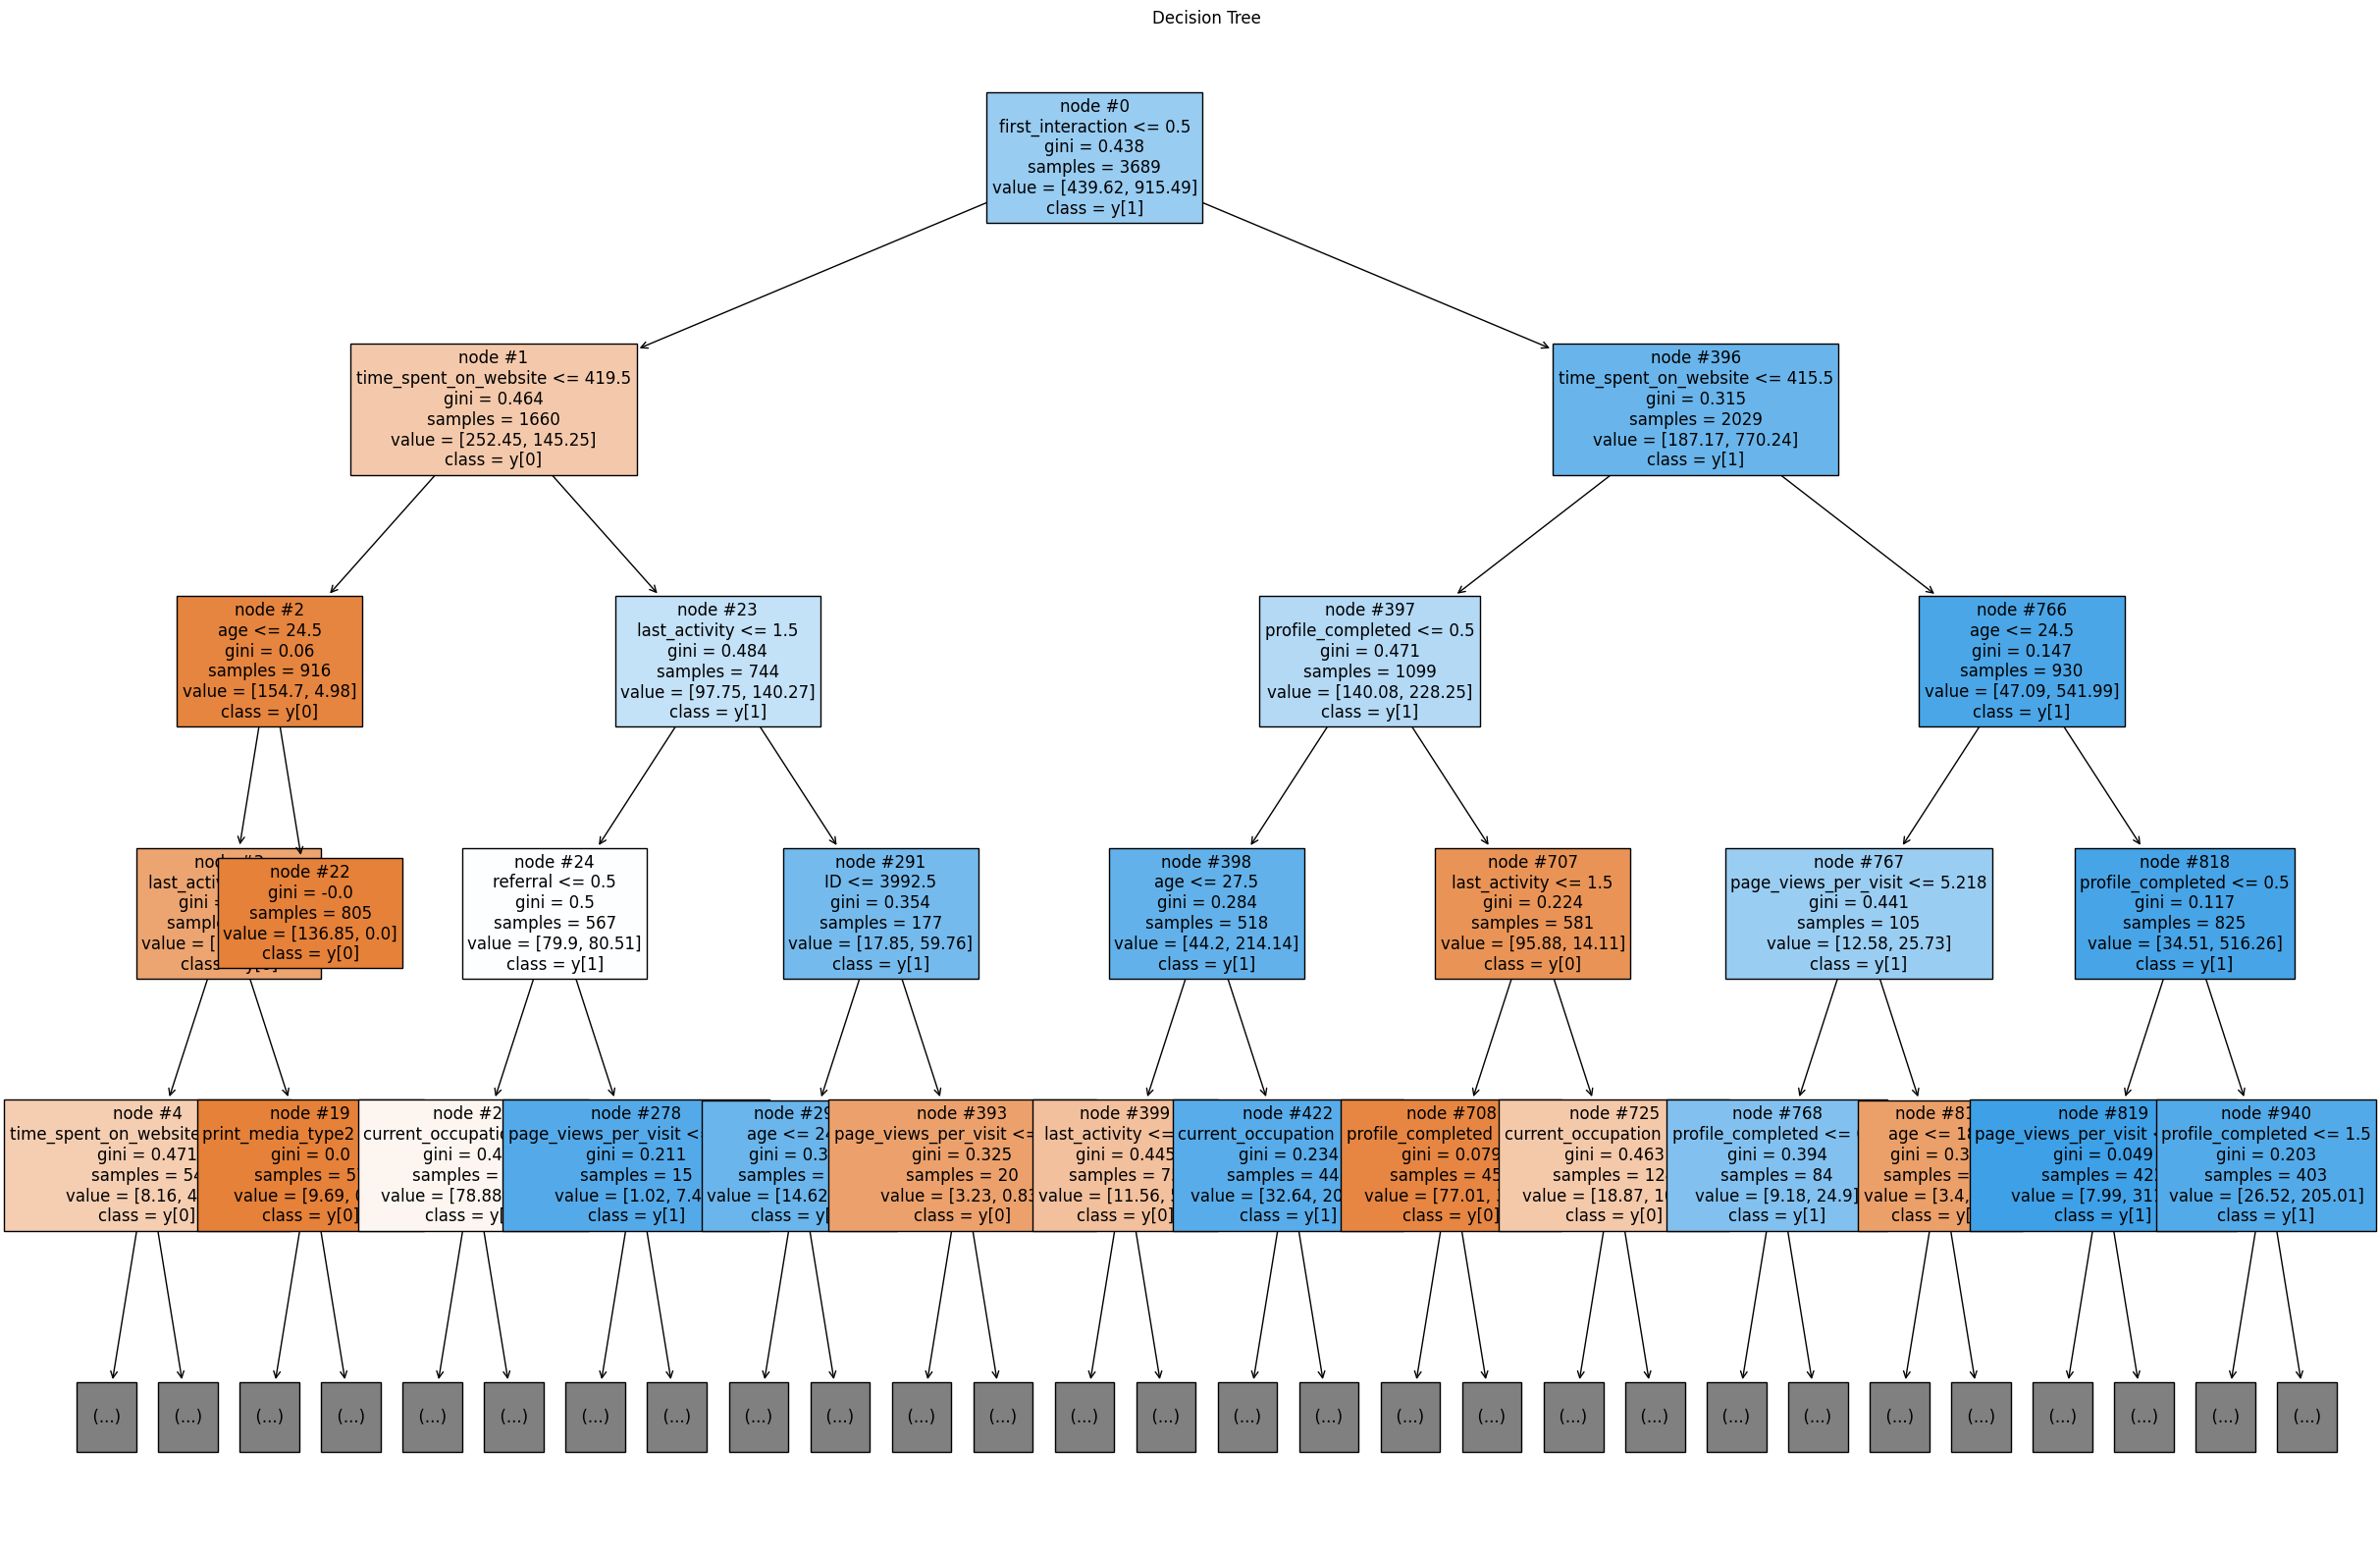

In [84]:
# Plot the Decision Tree
features = list(X.columns)

plt.figure(figsize=(30, 20))
plot_tree(dt, max_depth=4, feature_names=features, filled=True, fontsize=12, node_ids=True, class_names=True)
plt.title('Decision Tree')
plt.show()

The perfect performance on the training set coupled with significantly lower performance on the test set suggests that the model is overfitting the training data

to improve this pruning is required

## Do we need to prune the tree?

yeah pruning reduces the max depth, and minimises the leaf nodes

it also gives better results for accuracy for the test data set

In [85]:
#conditions for pruning
dt = DecisionTreeClassifier(class_weight={0: 0.17, 1: 0.83}, random_state=1,
                            max_depth=5, min_samples_split=10, min_samples_leaf=5)
dt.fit(X_train, y_train)


DecisionTreeClassifier(class_weight={0: 0.17, 1: 0.83}, max_depth=5,
                       min_samples_leaf=5, min_samples_split=10,
                       random_state=1)

In [86]:
# Checking performance on the training dataset
y_train_pred_dt = dt.predict(X_train)
print("Training Performance:")
metrics_score(y_train, y_train_pred_dt)


Training Performance:
Accuracy: 0.785307671455679
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.72      0.82      2586
           1       0.59      0.94      0.72      1103

    accuracy                           0.79      3689
   macro avg       0.78      0.83      0.77      3689
weighted avg       0.85      0.79      0.79      3689

Confusion Matrix:
[[1863  723]
 [  69 1034]]


In [87]:
# Checking performance on the test dataset
y_test_pred_dt = dt.predict(X_test)
print("Testing Performance:")
metrics_score(y_test, y_test_pred_dt)


Testing Performance:
Accuracy: 0.8017334777898159
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.75      0.84       649
           1       0.61      0.93      0.74       274

    accuracy                           0.80       923
   macro avg       0.79      0.84      0.79       923
weighted avg       0.86      0.80      0.81       923

Confusion Matrix:
[[484 165]
 [ 18 256]]


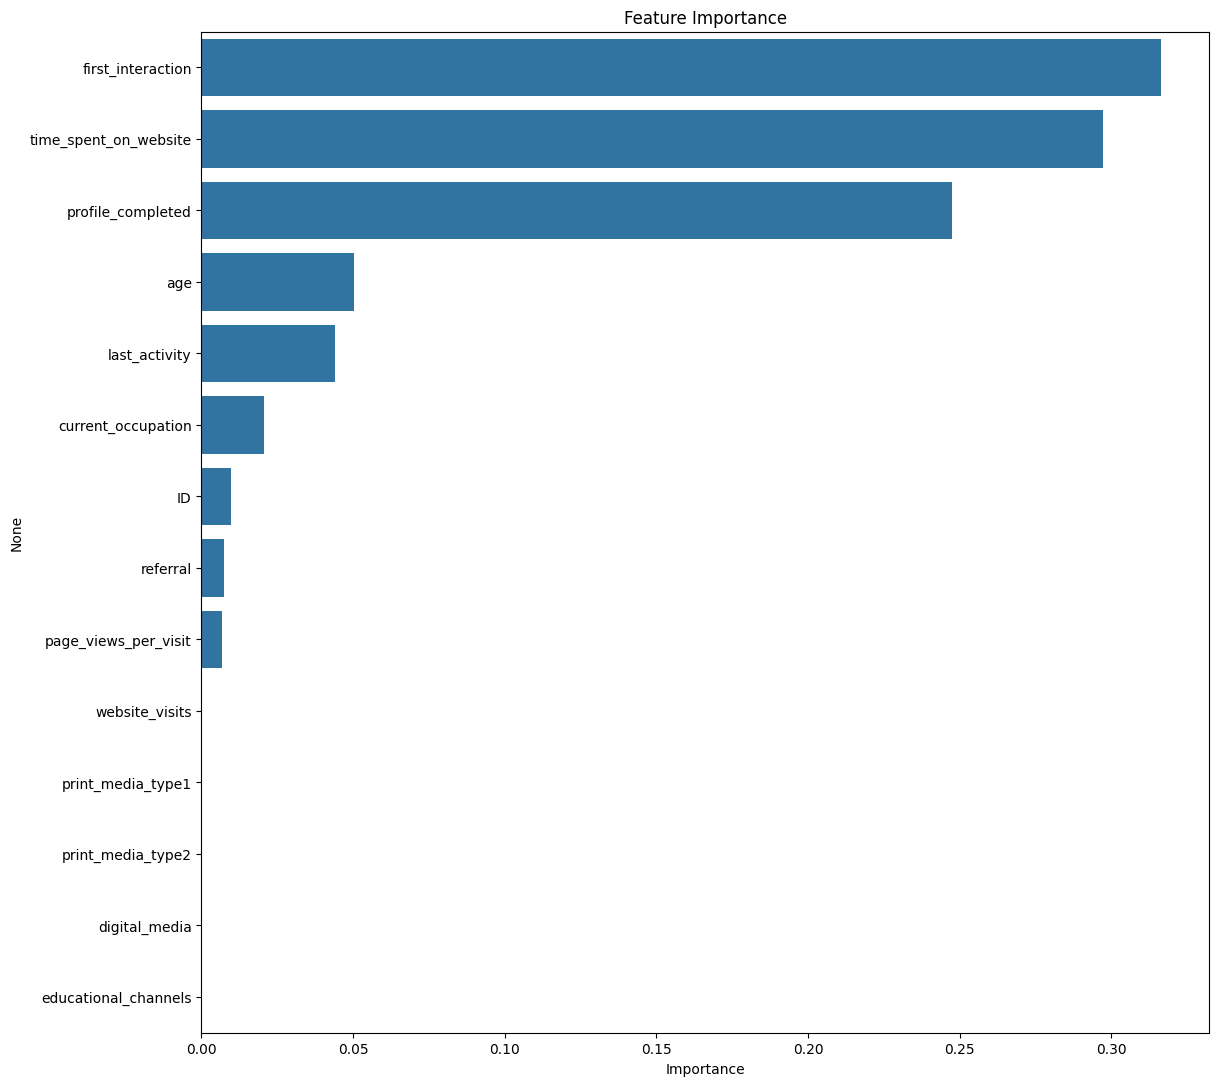

In [88]:
# Plot the feature importance
importances = dt.feature_importances_
columns = X.columns
importance_df = pd.DataFrame(importances, index=columns, columns=['Importance']).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(13, 13))
sns.barplot(data=importance_df, x='Importance', y=importance_df.index)
plt.title('Feature Importance')
plt.show()


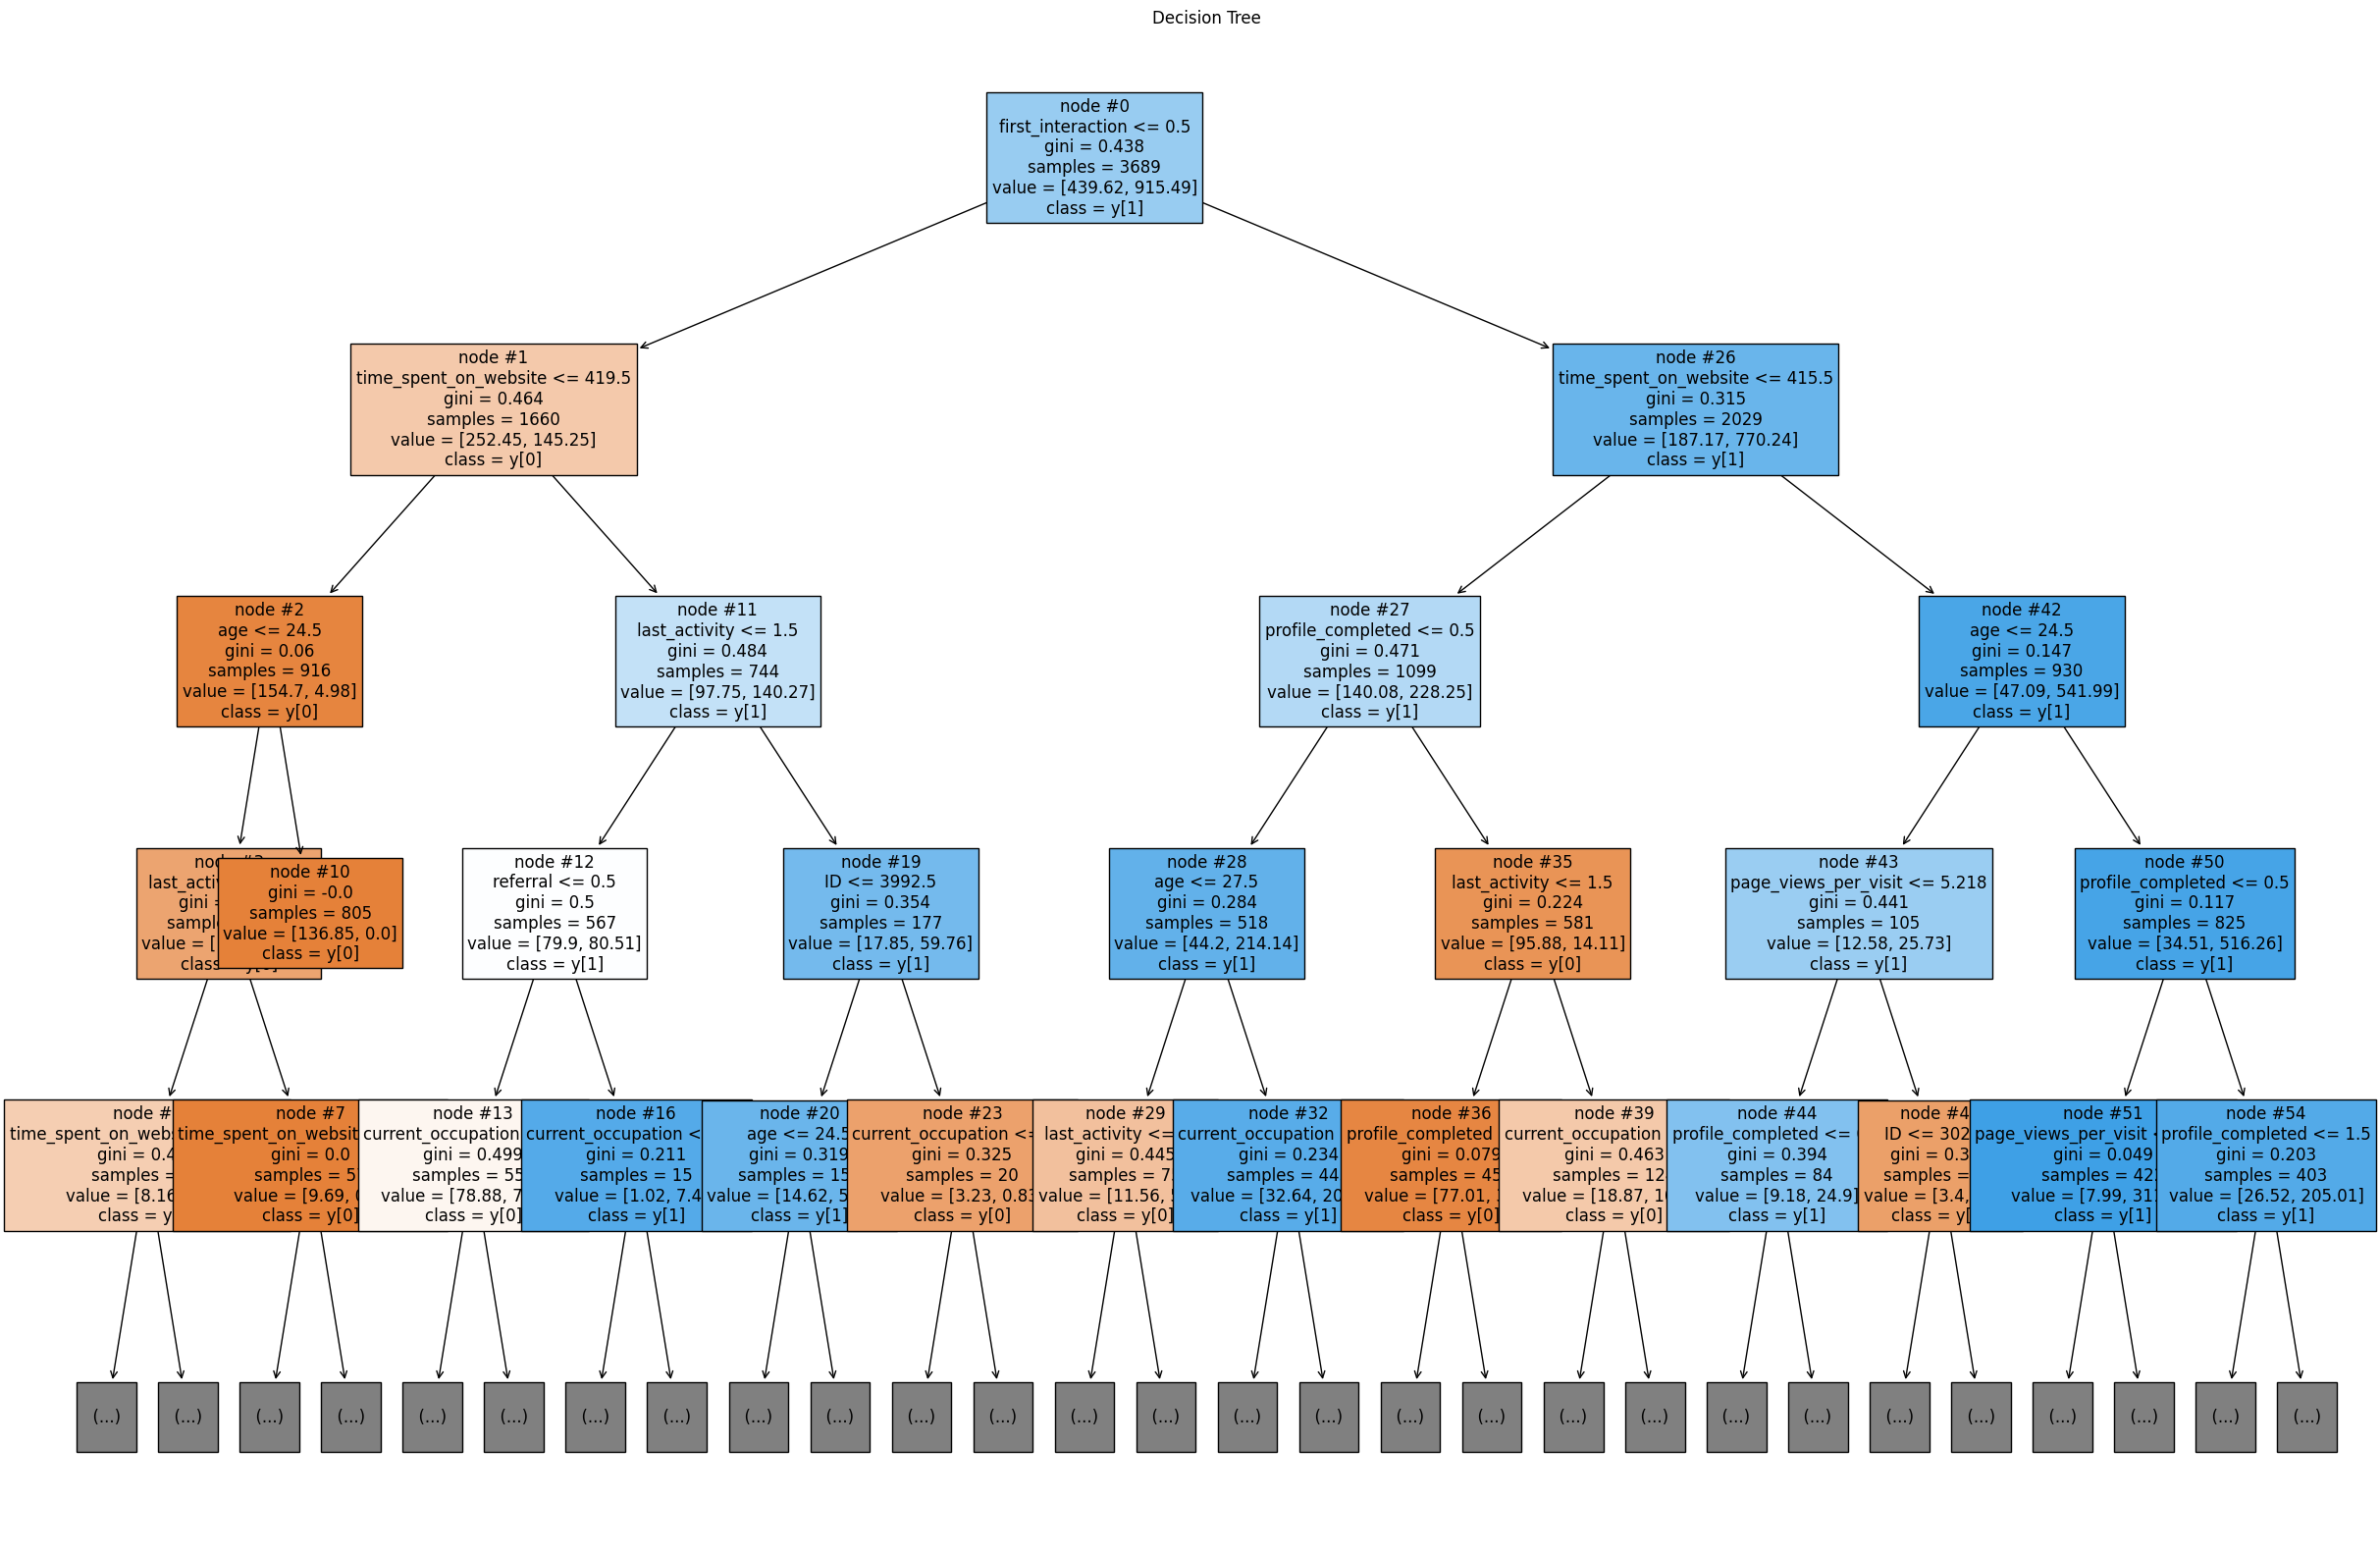

In [89]:
# Plot the Decision Tree
features = list(X.columns)

plt.figure(figsize=(30, 20))
plot_tree(dt, max_depth=4, feature_names=features, filled=True, fontsize=12, node_ids=True, class_names=True)
plt.title('Decision Tree')
plt.show()

after pruning, The test set accuracy being slightly higher than the training set accuracy suggests that the model generalizes well and is not overfitting.

From the tree we see that the number of nodes have also been reduced

GRID SEARCH:

In [90]:
# Building the Decision Tree model
dt = DecisionTreeClassifier(class_weight={0: 0.17, 1: 0.83}, random_state=1)

# Hyperparameter tuning using GridSearchCV
param_grid = {'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]}

grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')
grid_search.fit(X_train, y_train)

# choosing Best parameters from GridSearchCV
print("Best parameters found: ", grid_search.best_params_)

# Evaluating the best estimator on the test dataset
best_dt_estimator = grid_search.best_estimator_

y_test_pred_best_dt = best_dt_estimator.predict(X_test)
print("Tuned Decision Tree Testing Performance:")
metrics_score(y_test, y_test_pred_best_dt)



Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best parameters found:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Tuned Decision Tree Testing Performance:
Accuracy: 0.8179848320693391
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.90      0.87       649
           1       0.72      0.63      0.67       274

    accuracy                           0.82       923
   macro avg       0.79      0.76      0.77       923
weighted avg       0.81      0.82      0.81       923

Confusion Matrix:
[[582  67]
 [101 173]]


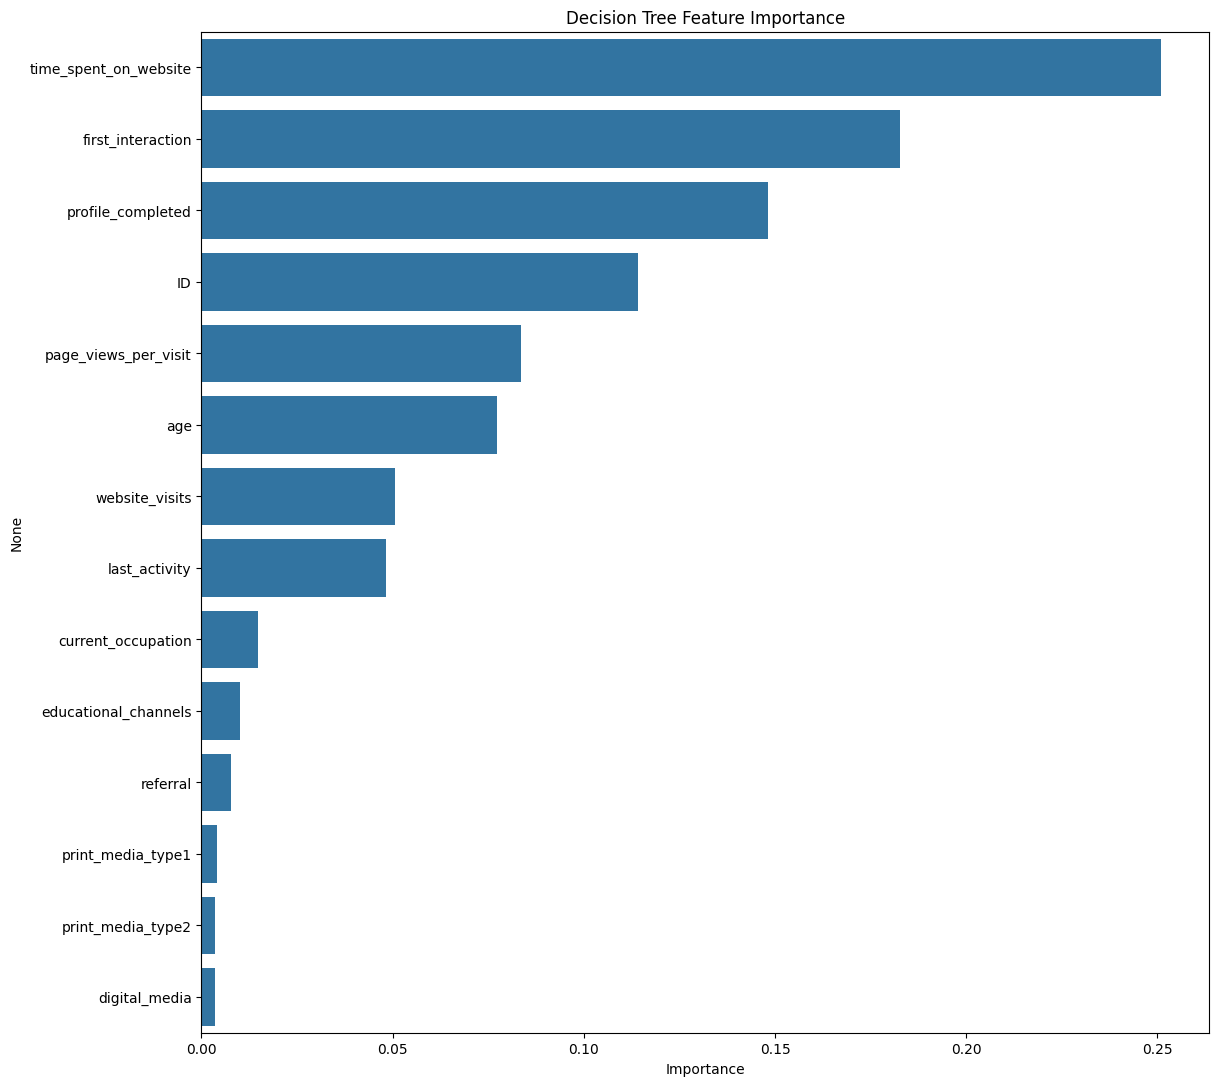

In [91]:
# Plot the feature importance
importances_dt = best_dt_estimator.feature_importances_
columns = X.columns
importance_df_dt = pd.DataFrame(importances_dt, index=columns, columns=['Importance']).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(13, 13))
sns.barplot(data=importance_df_dt, x='Importance', y=importance_df_dt.index)
plt.title('Decision Tree Feature Importance')
plt.show()

## Building a Random Forest model

In [92]:
# Building and training the Random Forest model
rf_estimator = RandomForestClassifier(class_weight={0: 0.17, 1: 0.83}, random_state=1)
rf_estimator.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.17, 1: 0.83}, random_state=1)

In [93]:
# Checking performance on the training dataset
y_train_pred_rf = rf_estimator.predict(X_train)
print("Random Forest Training Performance:")
metrics_score(y_train, y_train_pred_rf)

Random Forest Training Performance:
Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2586
           1       1.00      1.00      1.00      1103

    accuracy                           1.00      3689
   macro avg       1.00      1.00      1.00      3689
weighted avg       1.00      1.00      1.00      3689

Confusion Matrix:
[[2586    0]
 [   0 1103]]


In [94]:
# Checking performance on the test dataset
y_test_pred_rf = rf_estimator.predict(X_test)
print("Random Forest Testing Performance:")
metrics_score(y_test, y_test_pred_rf)

Random Forest Testing Performance:
Accuracy: 0.8624052004333694
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.94      0.91       649
           1       0.84      0.67      0.74       274

    accuracy                           0.86       923
   macro avg       0.85      0.81      0.82       923
weighted avg       0.86      0.86      0.86       923

Confusion Matrix:
[[613  36]
 [ 91 183]]


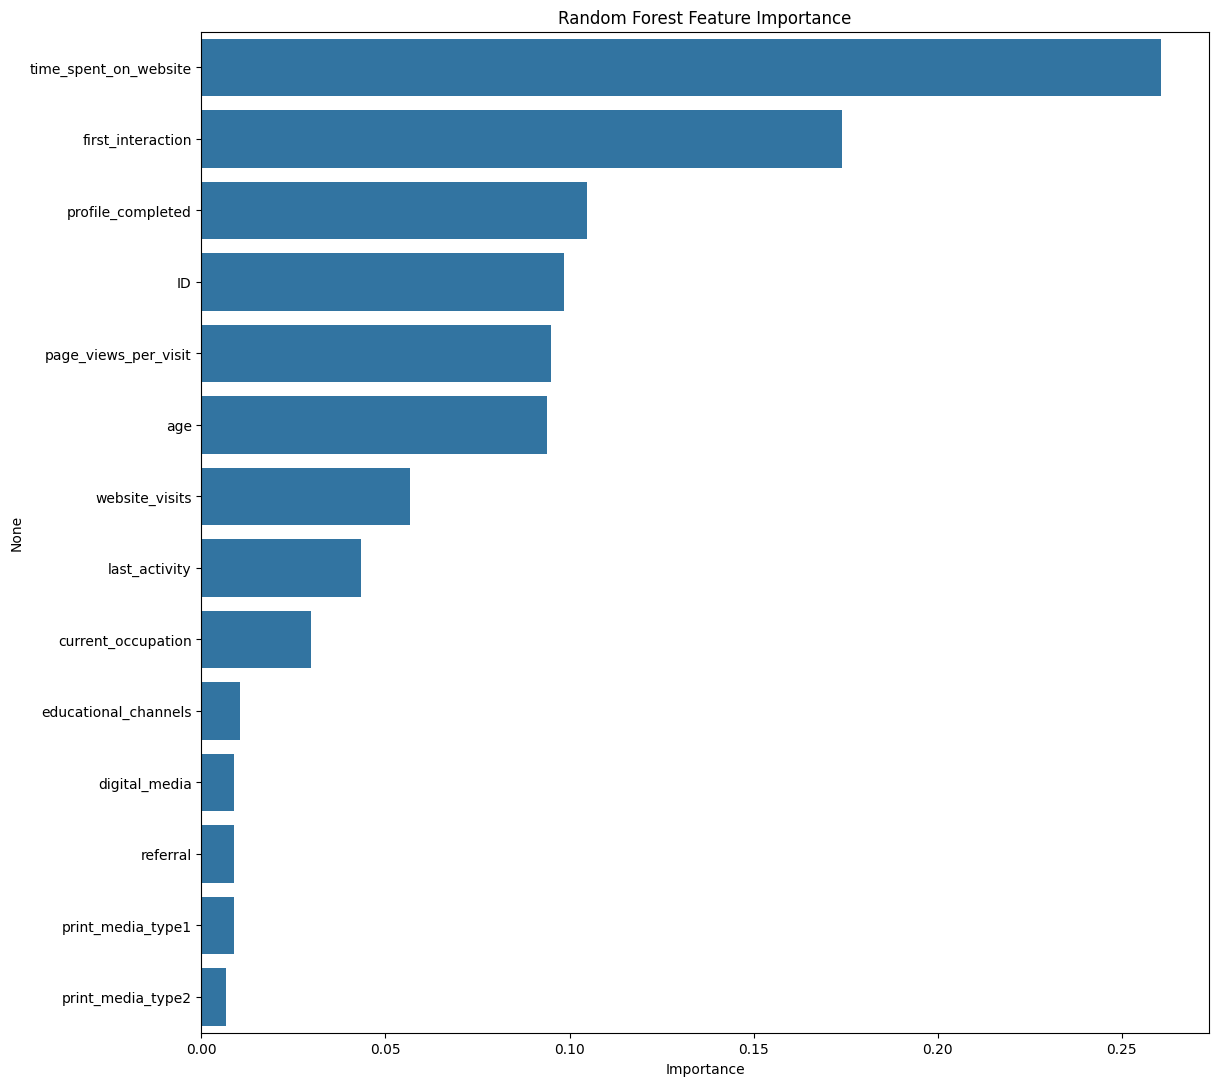

In [95]:
# Plot the feature importance
importances_rf = rf_estimator.feature_importances_
columns = X.columns
importance_df_rf = pd.DataFrame(importances_rf, index=columns, columns=['Importance']).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(13, 13))
sns.barplot(data=importance_df_rf, x='Importance', y=importance_df_rf.index)
plt.title('Random Forest Feature Importance')
plt.show()

In [ ]:
# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf_estimator, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


In [ ]:
# Best parameters from GridSearchCV
print("Best parameters found: ", grid_search.best_params_)

# Evaluating the best estimator on the test dataset
best_rf_estimator = grid_search.best_estimator_

y_test_pred_best_rf = best_rf_estimator.predict(X_test)
print("Tuned Random Forest Testing Performance:")
metrics_score(y_test, y_test_pred_best_rf)

In [ ]:
plt.figure(figsize=(30, 20))
plot_tree(best_rf_estimator.estimators_[0], max_depth=4, feature_names=columns, filled=True, fontsize=12, node_ids=True, class_names=True)
plt.title('Random Forest Tree (Tree 1)')
plt.show()

The high recall indicates that the model is effective at identifying true negatives, but the precision indicates that there are some false positives

The relatively high number of false negatives in class 1 indicates that the model often fails to identify true conversions


## Do we need to prune the tree?

Similar to the trees we have to prune the forest even though it increases the accuracy as there is difference in recall



In [ ]:
#conditions for pruning(reducing the node)
rf_estimator = RandomForestClassifier(class_weight={0: 0.17, 1: 0.83}, random_state=1,
                                      max_depth=10, min_samples_split=5, min_samples_leaf=2, max_features='sqrt')

rf_estimator.fit(X_train, y_train)

In [ ]:
# Checking performance on the training dataset
y_train_pred_rf = rf_estimator.predict(X_train)
print("Random Forest Training Performance:")
metrics_score(y_train, y_train_pred_rf)

In [ ]:
# Checking performance on the test dataset
y_test_pred_rf = rf_estimator.predict(X_test)
print("Random Forest Testing Performance:")
metrics_score(y_test, y_test_pred_rf)

In [ ]:
# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid_search_rf = GridSearchCV(estimator=rf_estimator, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)

# Best parameters from GridSearchCV
print("Best parameters found: ", grid_search_rf.best_params_)

# best estimator on the test dataset
best_rf_estimator = grid_search_rf.best_estimator_

y_test_pred_best_rf = best_rf_estimator.predict(X_test)
print("Tuned Random Forest Testing Performance:")
metrics_score(y_test, y_test_pred_best_rf)

In [ ]:
# Plot the feature importance
importances_rf = rf_estimator.feature_importances_
columns = X.columns
importance_df_rf = pd.DataFrame(importances_rf, index=columns, columns=['Importance']).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(13, 13))
sns.barplot(data=importance_df_rf, x='Importance', y=importance_df_rf.index)
plt.title('Random Forest Feature Importance')
plt.show()

it indicated overfitting

The tuned parameters of the  forest provides better performance compared to previous results.

## Actionable Insights and Recommendations

### INSIGHTS:
The Decision Tree model suffers from overfitting with perfect training performance but significantly lower testing performance.

The Random Forest model shows improved generalization compared to the Decision Tree. Although it slightly overfits, its testing performance indicates that  it balances precision and  has recall value better than the Decision Tree.

Tuning the Random Forest model further enhances its performance, particularly improving the balance between precision and recall.


The SVM model excels in recall.





### Recommendations:
Ensure that all new users are guided and encouraged to complete their profiles to the highest level. This can be achieved through step-by-step tutorials, prompts, and incentives.

Track the number of visits and time spent, and use this data to personalize content and improve user engagement.

 Improve the quality and variety of content available on the website to increase page views per visit.

 Increase digital media campaigns and integrate more interactive and engaging digital content.(digital media engagemnet)

Promote educational content and resources more actively across all user segments as Users with educational channels tend to be more involved.

follow up website activity with relevant emails or notifications to keep users engaged.

Track the status of users to identify active versus inactive ones. Develop strategies to re-engage inactive users through targeted campaigns and offers.

Implement a feedback mechanism to understand why users become inactive and address these issues to improve retention.